##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for experts

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/advanced"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

Import TensorFlow into your program:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import os
import urllib
import cv2
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape, Concatenate, GlobalMaxPooling2D

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train
x_test = x_test
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

Use `tf.data` to batch and shuffle the dataset:

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Build the `tf.keras` model using the Keras [model subclassing API](https://www.tensorflow.org/guide/keras#model_subclassing):

In [ ]:
IMGWIDTH = 28
class Classifier:
  def __init__():
    self.model = 0
    def predict(self, x):
      return self.model.predict(x)
    def fit(self, x, y):
      return self.model.train_on_batch(x, y)
    def get_accuracy(self, x, y):
      return self.model.test_on_batch(x, y)
    def load(self, path):
      self.model.load_weights(path)


class CGFACE:
  def __init__(self, learning_rate = 0.0001):
   self.model = self.init_model()
   optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
   self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
  def init_model(self):
    x = tf.keras.layers.Input(shape=(IMGWIDTH,IMGWIDTH,1))
    x = tf.keras.layers.Conv2D(8, (5,5), passing="same", activaton="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
      
    x = tf.keras.layers.Conv2D(16,(3, 3), padding='same', activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(16,(3, 3), padding='same', activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(16,(3, 3), padding='same', activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(256)(x)
    #y = tf.keras.layers.Input(shape=()) for audio track

    combined = concatenate(x,y)
    z = tf.keras.layers.Input()(combined)
    z = tf.keras.layers.Dense(144)(z)
    z = tf.keras.layers.Dense(10, activation)(z)

    return keras.model.Models(z)
   	 

# Create an instance of the model
model = CGFACE

In [9]:
data_augmentation = tf.keras.Sequential([
                                               preprocessing.RandomFlip("horizontal"),
                                               preprocessing.RandomRotation(0.2),
                                               preprocessing.RandomHeight(0.2),
                                               preprocessing.RandomWidth(0.2),
                                               preprocessing.RandomZoom(0.2),
                                               preprocessing.Rescaling(1/255.),
], name="data_augmentation")

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
#plt.imshow(x_train[0])
plt.imshow(data_augmentation(x_train)[0])
plt.show

In [11]:
IMGWIDTH = 28

input = Input(shape=(IMGWIDTH,IMGWIDTH,1),name="input_layer")
x = data_augmentation(input)
x = Conv2D(8, (5, 5), padding='same', activation = 'relu')(input)
x = MaxPooling2D(pool_size=(2,2),padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(16,(3, 3), padding='same', activation = 'relu')(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(16,(3, 3), padding='same', activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)

x = Dense(256)(x)
outputs = Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(input,outputs)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 16)          0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
1875/1875 [==============================] - 42s 6ms/step - loss: 0.8209 - accuracy: 0.8326 - val_loss: 0.1179 - val_accuracy: 0.9647
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2076 - accuracy: 0.9339 - val_loss: 0.0931 - val_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1608 - accuracy: 0.9498 - val_loss: 0.0634 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1433 - accuracy: 0.9555 - val_loss: 0.0575 - val_accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1310 - accuracy: 0.9592 - val_loss: 0.0581 - val_accuracy: 0.9808


In [14]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9808


[0.05808916687965393, 0.9807999730110168]

Choose an optimizer and loss function for training: 

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Use `tf.GradientTape` to train the model:

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

Test the model:

In [ ]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13281361758708954, Accuracy: 96.0133285522461, Test Loss: 0.06847486644983292, Test Accuracy: 97.75
Epoch 2, Loss: 0.04072786122560501, Accuracy: 98.72666931152344, Test Loss: 0.05615613982081413, Test Accuracy: 98.29000091552734
Epoch 3, Loss: 0.020463507622480392, Accuracy: 99.35832977294922, Test Loss: 0.05290212482213974, Test Accuracy: 98.32999420166016
Epoch 4, Loss: 0.012844893150031567, Accuracy: 99.59333801269531, Test Loss: 0.059989288449287415, Test Accuracy: 98.45999908447266
Epoch 5, Loss: 0.008425576612353325, Accuracy: 99.7316665649414, Test Loss: 0.05826634541153908, Test Accuracy: 98.36000061035156


The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials).

In [ ]:
y = tf.range(-99,101,4)
x = tf.range(1,51,1)
x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

x_train,y_train,x_test,y_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-99., -95., -91., -87., -83., -79., -75., -71., -67., -63., -59.,
        -55., -51., -47., -43., -39., -35., -31., -27., -23., -19., -15.,
        -11.,  -7.,  -3.,   1.,   5.,   9.,  13.,  17.,  21.,  25.,  29.,
         33.,  37.,  41.,  45.,  49.,  53.,  57.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([41., 42., 43., 44., 45., 46., 47., 48., 49., 50.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([61., 65., 69., 73., 77., 81., 85., 89., 93., 97.], dtype=float32)>)

In [ ]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
])

In [ ]:
model1.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(lr=0.1))


In [ ]:
epochs=1000
history=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs)

Epoch 1/1000
2/2 [==============================] - 0s 43ms/step - loss: 39.9469 - val_loss: 57.1854
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 39.7851 - val_loss: 62.1993
Epoch 3/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.7697 - val_loss: 65.3883
Epoch 4/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.8169 - val_loss: 67.8397
Epoch 5/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.8712 - val_loss: 68.7569
Epoch 6/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.9014 - val_loss: 69.3760
Epoch 7/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.9104 - val_loss: 70.0016
Epoch 8/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.8367 - val_loss: 68.8369
Epoch 9/1000
2/2 [==============================] - 0s 13ms/step - loss: 39.6849 - val_loss: 67.9158
Epoch 10/1000
2/2 [==============================] - 0s 14ms/step - loss: 39.5447 - val_los

In [ ]:
model1.evaluate(x_test,y_test)
model1.predict(x_test)

1/1 [==============================] - 0s 10ms/step - loss: 0.6596


array([[61.59262],
       [65.60751],
       [69.62239],
       [73.63728],
       [77.65216],
       [81.66705],
       [85.68193],
       [89.69681],
       [93.7117 ],
       [97.72658]], dtype=float32)

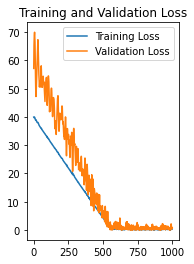

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model1.get_weights()

[array([[4.0148845]], dtype=float32), array([-103.01764], dtype=float32)]

In [17]:
!pip install comet_ml

     |████████████████████████████████| 293 kB 5.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 530 kB 38.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=59c17722ccacd5d459ce32c5cbc9dbfed8ce4e7e849e23c95ffc6f45f06a2216
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [1]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [2]:
import tensorflow
import tensorboard
import keras
experiment = Experiment(api_key="API_KEY",
                        project_name="urbansound8k")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: The given API key API_KEY is invalid, please check it against the dashboard. Your experiment would not be logged 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors/


In [5]:
# Load dataset
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')# Create a list of the class labels
labels = list(df['class'].unique())
# Let's grab a single audio file from each class
files = dict()
for i in range(len(labels)):
    tmp = df[df['class'] == labels[i]][:1].reset_index()
    path = 'UrbanSound8K/audio/fold{}/{}'.format(tmp['fold'][0], tmp['slice_file_name'][0])
    files[labels[i]] = path

FileNotFoundError: ignored

In [36]:
!pip install https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1

     |████████████████████████████████| 45.9 MB 18 kB/s 
  ERROR: Cannot unpack file /tmp/pip-unpack-2kjigmd1/ffmpeg-linux64-v3.3.1 (downloaded from /tmp/pip-req-build-gjhj0fz1, content-type: application/octet-stream); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-gjhj0fz1


In [27]:
!pip install moviepy

In [155]:
!pip install torchaudio

     |████████████████████████████████| 1.9 MB 5.1 MB/s 
     |████████████████████████████████| 831.4 MB 7.0 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import moviepy.editor as mp

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2605056/45929032 bytes (5.7%)5840896/45929032 bytes (12.7%)9281536/45929032 bytes (20.2%)12673024/45929032 bytes (27.6%)16080896/45929032 bytes (35.0%)19496960/45929032 bytes (42.5%)22822912/45929032 bytes (49.7%)26402816/45929032 bytes (57.5%)29884416/45929032 bytes (65.1%)33128448/45929032 bytes (72.1%)36593664/45929032 bytes (79.7%)40067072/45929032 bytes (87.2%)

In [29]:
import pandas as pd
import os
path = "/content/drive/MyDrive/fake news challenge/data"
for filename in os.listdir(path):
    f = os.path.join(path, filename)

my_clip = mp.VideoFileClip(f)

In [162]:
audio2 = my_clip.audio

[MoviePy] Writing audio in my_res.wav


100%|██████████| 1350/1350 [00:00<00:00, 1425.15it/s]

[MoviePy] Done.


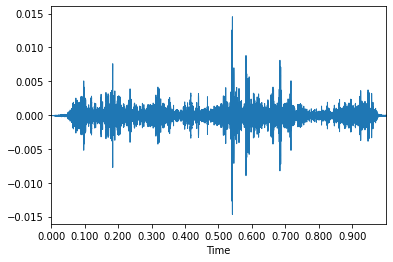

In [199]:
my_clip.audio.write_audiofile(filename = 'my_res.wav',codec='pcm_s16le')
samples, sample_rate = librosa.load("my_res.wav")
samples = scipy.signal.resample(samples, 8000)
librosa.display.waveplot(samples, 8000)

In [161]:
fps=my_clip.fps
audio1 = my_clip.audio.to_soundarray(nbytes=4, buffersize=1000, fps=fps)
import torchaudio

In [127]:
audio1[3669]

array([-0.00384521, -0.00387573])

In [172]:
len(samples), scipy_sample_rate

(489440, 44100)

In [119]:
n = my_clip.audio.AudioArrayClip(audio1, fps=fps)

AttributeError: ignored

In [200]:
all_wave = []
all_wave.append(samples)

In [201]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [202]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import moviepy.editor as mp
import scipy
from scipy.io import wavfile #for audio processing
import warnings
import ffmpeg
warnings.filterwarnings("ignore")

ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

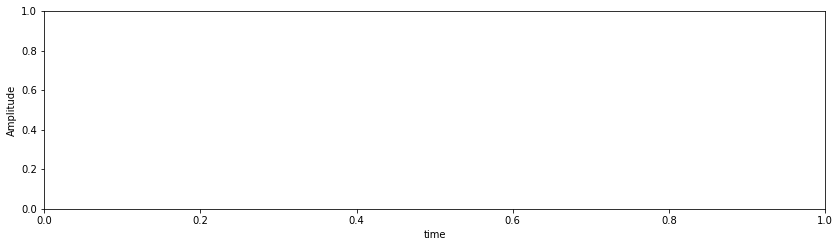

In [57]:
fig = plt.figure(figsize=(15,15))# Log graphic of waveforms to Comet
fig.subplots_adjust(hspace=0.4, wspace=0.4)


#data, sample_rate = librosa.load(audio)
#librosa.display.waveplot(audio)

samples, sample_rate = librosa.load("my_result.wav", sr = 8000)
samples, sample_rate
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)